# Prediction of Fraud using Random Forest

## Importing libraries

In [1]:
# Basic Python libraries for data handling and visualisations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Importing data handling libraries have been sucessful")

Importing data handling libraries have been sucessful


## Data preprocessing libraries from scikit-learn framework

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Data splitting and Random Forest library from Scikit-learn framework

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Model evaluation libraries from Scikit-learn framework

In [4]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [5]:
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [6]:
data = pd.read_csv("Fraud_check.csv")

In [7]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [8]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


## Data Exploration

### Data shape

In [9]:
data.shape

(600, 6)

### Data info

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


### Checking null values in the dataset

In [11]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

### Duplicate values in the dataset

In [12]:
data.duplicated().sum()

0

### Detecting outliers for numerical columns

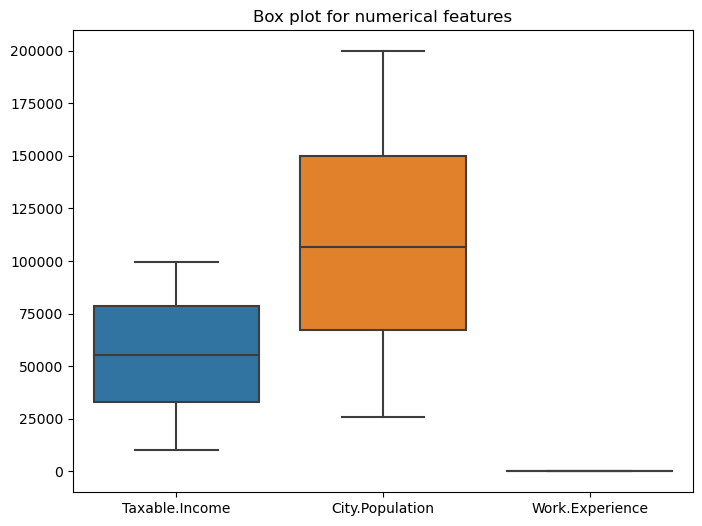

In [13]:
plt.figure(figsize = (8,6))
sns.boxplot(data = data[['Taxable.Income', 'City.Population', 'Work.Experience']])
plt.title(f'Box plot for numerical features')
plt.savefig("D:/Top Mentor_Data analytics class/01-09-2024\Assignment/Assignments/Project 10/Box plot.jpg")
plt.show()

## Exploratory Data analysis

### Summary Statistics

In [14]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


### Taxable income across marital status (Segmented by Graduation Status)

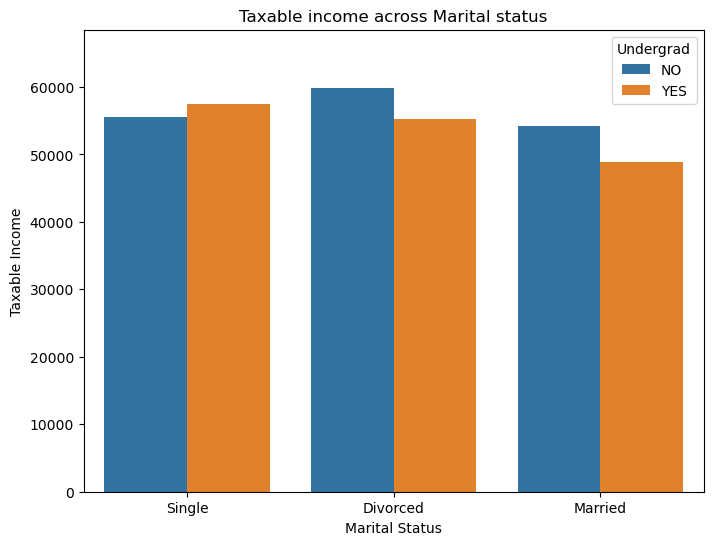

In [15]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'Marital.Status', y = 'Taxable.Income', hue = 'Undergrad', dodge = True, errwidth = 0)
plt.title("Taxable income across Marital status")
plt.xlabel("Marital Status")
plt.ylabel("Taxable Income")
plt.savefig("D:/Top Mentor_Data analytics class/01-09-2024\Assignment/Assignments/Project 10/Taxable Income across marital Status.jpg")
plt.show()

### Kernel density Plot for taxable Income, City Population and Work Experience

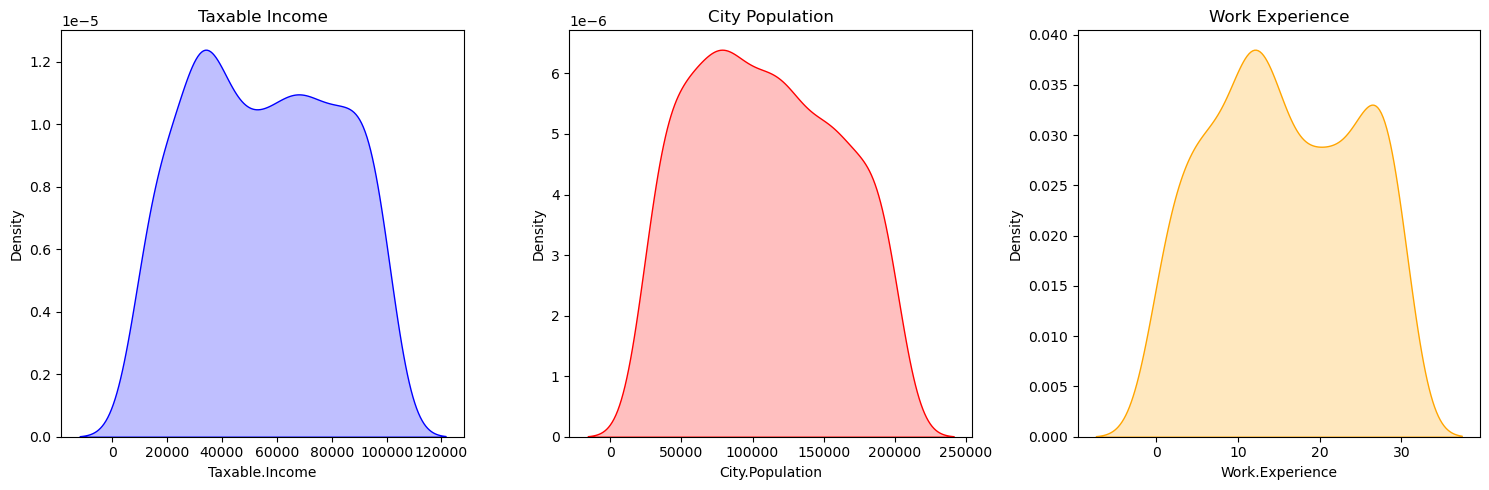

In [16]:
# Set up the figure size
plt.figure(figsize=(15, 5))

# Subplot 1: Taxable Income
fig1 = plt.subplot(1, 3, 1)
sns.kdeplot(data=data, x='Taxable.Income', fill=True, color='blue')
plt.title('Taxable Income')

# Subplot 2: City Population
fig2 = plt.subplot(1, 3, 2)
sns.kdeplot(data=data, x='City.Population', fill=True, color='red')
plt.title('City Population')

# Subplot 3: Work Experience
fig3 = plt.subplot(1, 3, 3)
sns.kdeplot(data=data, x='Work.Experience', fill=True, color='orange')
plt.title('Work Experience')

# Show the plots
plt.tight_layout()
plt.savefig("D:/Top Mentor_Data analytics class/01-09-2024\Assignment/Assignments/Project 10/KDE plot.jpg")
plt.show()

### Taxable income in Urban areas

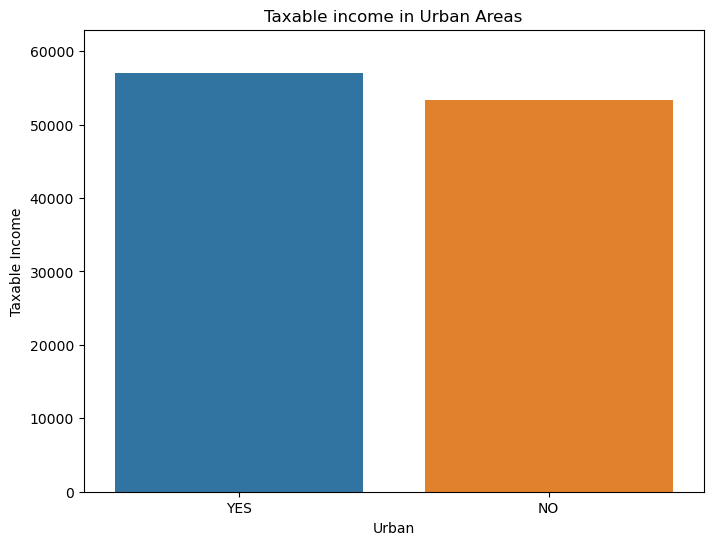

In [17]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'Urban', y = 'Taxable.Income', errwidth = 0)
plt.title("Taxable income in Urban Areas")
plt.xlabel("Urban")
plt.ylabel("Taxable Income")
plt.savefig("D:/Top Mentor_Data analytics class/01-09-2024\Assignment/Assignments/Project 10/Taxable Income in urban areas.jpg")
plt.show()

### Machine Learning Models

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [19]:
X = data[['Undergrad', 'Marital.Status', 'Work.Experience', 'Urban']]

In [20]:
X.sample(10)

,Undergrad,Marital.Status,Work.Experience,Urban
239,NO,Divorced,26,NO
260,YES,Single,28,NO
66,YES,Married,12,YES
143,YES,Single,11,NO
308,YES,Married,30,NO
49,NO,Divorced,15,YES
529,NO,Divorced,14,NO
322,NO,Divorced,24,YES
188,NO,Divorced,10,NO
373,NO,Married,21,YES


In [21]:
X['Undergrad'] = X['Undergrad'].replace({'NO': 0, 'YES':1})
X['Urban'] = X['Urban'].replace({'NO': 0, 'YES':1})
X['Marital.Status'] = X['Marital.Status'].replace({'Single': 0, 'Married':1, 'Divorced':2})

In [22]:
X.sample(10)

,Undergrad,Marital.Status,Work.Experience,Urban
22,1,2,14,0
134,1,1,28,0
404,1,2,21,1
40,0,0,26,1
361,1,2,20,0
93,1,1,3,1
88,0,1,24,1
137,1,0,6,0
124,1,2,13,0
495,0,1,24,0


### Categorising the target column (Taxable.Income)

In [23]:
for i in data['Taxable.Income']:
    if i<= 30000:
        data['Taxable.Income']= data['Taxable.Income'].replace ({i:'Risky'})
    else:
        data['Taxable.Income']= data['Taxable.Income'].replace ({i:'Good'})

In [24]:
y = data['Taxable.Income']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1234)

In [26]:
X_train.shape

(420, 4)

In [27]:
X_test.shape

(180, 4)

### Label encoding of target variable

In [28]:
le = LabelEncoder()

In [29]:
le.fit_transform(y_train)
le.transform(y_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0])

### Random Forest Model

In [30]:
rf = RandomForestClassifier(n_estimators = 500, max_depth = 4, random_state = 2, criterion='gini',  min_samples_split=4, min_samples_leaf=3)

In [31]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=4,
                       n_estimators=500, random_state=2)

In [32]:
rf_pred = rf.predict(X_test)

In [33]:
rf_accuracy = accuracy_score(y_test, rf_pred)*100
print(f'Accuracy of the model is: {rf_accuracy:.2f}%')

Accuracy of the model is: 80.00%


In [34]:
rf_report = classification_report(y_test, rf_pred)
print (rf_report)

              precision    recall  f1-score   support

        Good       0.80      1.00      0.89       144
       Risky       0.00      0.00      0.00        36

    accuracy                           0.80       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.64      0.80      0.71       180



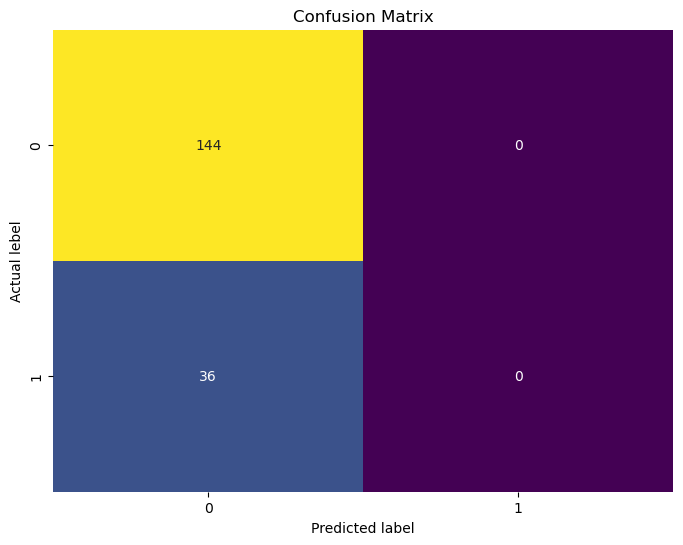

In [35]:
conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("Actual lebel")
plt.show()